# Gathering the data


In [1]:
# Import essential libraries 
import pandas as pd
import requests 
import tweepy 
import json
import time
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [3]:
r = requests.get(url)
with  open('image_predictions.tsv', 'wb') as f:
    f.write(r.content)



In [4]:
twitter_data= pd.read_csv('twitter-archive-enhanced.csv')
prediction_data= pd.read_csv('image_predictions.tsv',sep='\t')



In [5]:
twitter_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
prediction_data.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [7]:
consumer_key = '##################'
consumer_secret = '#####################'
access_token = '##############-#########'
access_secret = '##########################################'


In [8]:
'''auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)
# store tweets IDs that's exist and not in diffrent formats 
# the json for the exists tweets and list for f

cant_find_tweets = []

with open('tweet_json.txt', 'w') as f:
    start = time.time()

    for tweet_id in twitter_data['tweet_id']:   
        try:
            
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except Exception as e:
            cant_find_tweets.append(tweet_id)
    end= time.time()
print('time needed : ',end-start)
print ('tweets doesn't have data in API :',len(cant_find_tweets))'''

"auth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\napi = tweepy.API(auth,\n                 wait_on_rate_limit = True, \n                 wait_on_rate_limit_notify = True)\n# store tweets IDs that's exist and not in diffrent formats \n# the json for the exists tweets and list for f\n\ncant_find_tweets = []\n\nwith open('tweet_json.txt', 'w') as f:\n    start = time.time()\n\n    for tweet_id in twitter_data['tweet_id']:   \n        try:\n            \n            tweet = api.get_status(tweet_id,tweet_mode='extended')\n            json.dump(tweet._json, f)\n            f.write('\n')\n        except Exception as e:\n            cant_find_tweets.append(tweet_id)\n    end= time.time()\nprint('time needed : ',end-start)\nprint ('tweets doesn't have data in API :',len(cant_find_tweets))"

In [9]:
tweet_json = pd.read_json('tweet_json.txt',lines=True)


# Assessing the data 

In [10]:
twitter_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_data.duplicated().sum()

0

In [13]:
twitter_data.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Bailey         7
Daisy          7
Buddy          7
Toby           7
Rusty          6
Milo           6
Leo            6
Koda           6
Stanley        6
Scout          6
Jack           6
Bella          6
Jax            6
Oscar          6
Dave           6
Phil           5
            ... 
Spark          1
Koko           1
Reptar         1
Margo          1
Dietrich       1
by             1
Godi           1
Katie          1
Fletcher       1
Lizzie         1
Duchess        1
Biden          1
Shooter        1
Clifford       1
Dido           1
Sora           1
Jonah          1
Maxwell        1
Hermione       1
Todo           1
Buddah         1
Sprinkles      1
Birf           1
Remy           1
Carbon         1
Jennifur       1
Barclay        1
General       

In [14]:
twitter_data.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
prediction_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#bring only this columns from the json file id ,retweet_count,favorite_count 
tweet_json_modified= tweet_json.loc[:,['id','retweet_count','favorite_count']]
tweet_json_modified= tweet_json_modified.rename(columns={"id": "tweet_id"})

In [18]:
tweet_json_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [19]:
tweet_json_modified.describe()


,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.00000,2331.000000
mean,7.419079e+17,2603.55813,7336.684256
std,6.823170e+16,4404.48562,11394.554122
min,6.660209e+17,1.00000,0.000000
25%,6.782670e+17,528.50000,1275.000000
50%,7.182469e+17,1215.00000,3185.000000
75%,7.986692e+17,3020.50000,8973.000000
max,8.924206e+17,74767.00000,151101.000000


In [20]:
prediction_data.duplicated().sum()

0

In [21]:
prediction_data.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [22]:
print('twitter_data rows = ',twitter_data.shape[0])
print('prediction_data rows = ',prediction_data.shape[0])



twitter_data rows =  2356
prediction_data rows =  2075


In [23]:
twitter_data.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

### Tidiness Issues 
* prediction data should be in the same file in the archived Twitter data file
* columns (tweet_id, retweet_count,favorite_count) in the JSON file should be in the same file with twitter data and prediction data
- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - 
### Quality Issues in twitter archived data
*  there are retweets in the data 
* timestamp not in a datetime format
* the most name in the  “name” column is  'a' 
*  there some outliers in (rating_numerator, rating_denominator)

#### Quality Issues in Twitter prediction  data

* the prediction for the dog breed it's not actually a dog all the time 

#### Quality Issues in JSON file 

*  there are some uninformative columns
* some tweets in the original file doesn't have a match in the JSON file 
* there a min values that don’t make sense in (retweet_count,favorite_count)

 

# Cleaning the data 

### solving the tidness issues

In [24]:
# Merge all dataframes in one place

df_clean = pd.merge(twitter_data, prediction_data,on='tweet_id', how='inner') #1
df_clean = pd.merge(df_clean, tweet_json_modified,on='tweet_id', how='inner') #2

In [25]:
df_clean.columns
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7408,35141
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5515,30404
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3638,22862
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7587,38416
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8159,36666
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2739,18488
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1772,10748
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16576,59149
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,3788,25441
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6425,29052


### solving the quality issues

#### 1- drop uninformative columns


In [26]:
df_clean.drop(['in_reply_to_user_id',
                        'in_reply_to_status_id',
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], axis=1,inplace = True)

#### 2- remove retweets

In [27]:
# drop the rows
df_clean.drop(df_clean[df_clean.retweeted_status_id.notnull()== True].index, inplace=True)

In [28]:
#drop the columns
df_clean.drop('retweeted_status_id',axis= 1,inplace=True)

In [29]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

#### 3- convert object type to datetime in the timestamp column

In [30]:
df_clean.timestamp=df_clean.timestamp.apply(pd.to_datetime)


In [31]:
df_clean.timestamp.dtype

dtype('<M8[ns]')

#### 4- replace the name 'a' with None value of the dog's name 

In [32]:
df_clean.name.value_counts()

None         546
a             55
Oliver        10
Cooper        10
Charlie       10
Lucy           9
Tucker         9
Penny          9
Winston        8
Sadie          8
Toby           7
Daisy          7
the            7
Lola           7
Jax            6
Bella          6
Koda           6
Bo             6
an             6
Stanley        6
Louis          5
Scout          5
Dave           5
Chester        5
Rusty          5
Milo           5
Bailey         5
Leo            5
Buddy          5
Oscar          5
            ... 
Mosby          1
Banjo          1
Aja            1
Maks           1
Barclay        1
Remy           1
Karl           1
Birf           1
Chadrick       1
Stuart         1
Mike           1
Kawhi          1
Godi           1
Fletcher       1
Lizzie         1
Duchess        1
Biden          1
Shooter        1
Clifford       1
Dido           1
Sora           1
Jonah          1
Billy          1
Maxwell        1
Hermione       1
Todo           1
Buddah         1
Sprinkles     

In [33]:
df_clean['name'] = df_clean['name'].replace(['a'],None)


In [34]:
df_clean.name.value_counts()

None         565
Oliver        12
Charlie       10
Cooper        10
Penny          9
Tucker         9
Lucy           9
the            9
Daisy          8
Winston        8
an             8
Sadie          8
Lola           7
Stanley        7
Toby           7
Koda           6
Bo             6
Jax            6
Bella          6
Chester        5
Bailey         5
Dave           5
Gary           5
Leo            5
Oscar          5
Scout          5
Rusty          5
Milo           5
Buddy          5
Louis          5
            ... 
Shnuggles      1
Maks           1
Andru          1
Moofasa        1
Logan          1
Halo           1
Lilly          1
General        1
Jonah          1
Godi           1
Fletcher       1
Lizzie         1
Duchess        1
Biden          1
Shooter        1
Clifford       1
Dido           1
Sora           1
Billy          1
Barclay        1
Maxwell        1
Hermione       1
Todo           1
Buddah         1
Sprinkles      1
Paull          1
Birf           1
Remy          

#### 5-drop the outliers in (rating_numerator, rating_denominator)



In [35]:
df_clean.rating_denominator.value_counts()

10     1969
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [36]:
df_clean.rating_numerator.value_counts()

12      448
10      418
11      396
13      257
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [37]:
print('value 170\n',df_clean[df_clean.rating_denominator == 170].text)
print('value 150\n',df_clean[df_clean.rating_denominator == 150].text)
print('value 130\n',df_clean[df_clean.rating_denominator == 130].text)
print('value 120\n',df_clean[df_clean.rating_denominator == 120].text)
print('value 110\n',df_clean[df_clean.rating_denominator == 110].text)

value 170
 911    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
value 150
 722    Why does this never happen at my front door......
Name: text, dtype: object
value 130
 1366    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
value 120
 1498    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
value 110
 1367    Someone help the girl is being mugged. Several...
Name: text, dtype: object


In [38]:
df_clean.drop(df_clean[df_clean['rating_numerator']>=400].index, inplace=True)


In [39]:
df_clean.drop(df_clean[df_clean['rating_denominator']>=50].index, inplace=True)


#### 6- the prediction for the dog breed it's not actully a dog all the time 
accroding the values of True and False of the prediction of 3 algorithms so we could consider this in our work

#### 7- some tweets in the original file doesn't have match in json file 
 this solved in merge method  with inner join that is match only exist is on each file 

In [40]:
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.973000e+03,1973.000000,1973.000000,1973.000000,1973.000000,1.973000e+03,1.973000e+03,1973.000000,1973.000000
mean,7.357741e+17,10.604663,10.015712,1.203751,0.593553,1.346965e-01,6.029367e-02,2369.567157,8049.576280
std,6.752737e+16,2.802277,0.738163,0.562563,0.272120,1.006635e-01,5.082766e-02,4243.295527,11855.727347
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,69.000000
25%,6.757816e+17,10.000000,10.000000,1.000000,0.360428,5.413540e-02,1.619070e-02,529.000000,1703.000000
50%,7.081494e+17,11.000000,10.000000,1.000000,0.587372,1.181810e-01,4.952370e-02,1144.000000,3632.000000
75%,7.878106e+17,12.000000,10.000000,1.000000,0.845256,1.954050e-01,9.193000e-02,2704.000000,9994.000000
max,8.924206e+17,75.000000,40.000000,4.000000,1.000000,4.880140e-01,2.710420e-01,74767.000000,151101.000000


#### 8- there are a minimum values doesn't make sense in (retweet_count,favorite_count)
droped with outlier in (rating_numerator , rating_denominator)

# Store

In [41]:
# store the data in csv file 
#df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Analyzing, and Visualizing Data for this Project

##### Through the project from gathering the data and  assigning and cleaned and eventually the last step shows our work

In [42]:
df = pd.read_csv('twitter_archive_master.csv')

##### the describes method give us intuition about the data here we have 1973 sample of the data after cleaning and dropping the outliers, also the mean of favorites of all tweets is 8049 and retweets is 2369

In [48]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.973000e+03,1973.000000,1973.000000,1973.000000,1973.000000,1.973000e+03,1.973000e+03,1973.000000,1973.000000
mean,7.357741e+17,10.604663,10.015712,1.203751,0.593553,1.346965e-01,6.029367e-02,2369.567157,8049.576280
std,6.752737e+16,2.802277,0.738163,0.562563,0.272120,1.006635e-01,5.082766e-02,4243.295527,11855.727347
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,69.000000
25%,6.757816e+17,10.000000,10.000000,1.000000,0.360428,5.413540e-02,1.619070e-02,529.000000,1703.000000
50%,7.081494e+17,11.000000,10.000000,1.000000,0.587372,1.181810e-01,4.952370e-02,1144.000000,3632.000000
75%,7.878106e+17,12.000000,10.000000,1.000000,0.845256,1.954050e-01,9.193000e-02,2704.000000,9994.000000
max,8.924206e+17,75.000000,40.000000,4.000000,1.000000,4.880140e-01,2.710420e-01,74767.000000,151101.000000


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


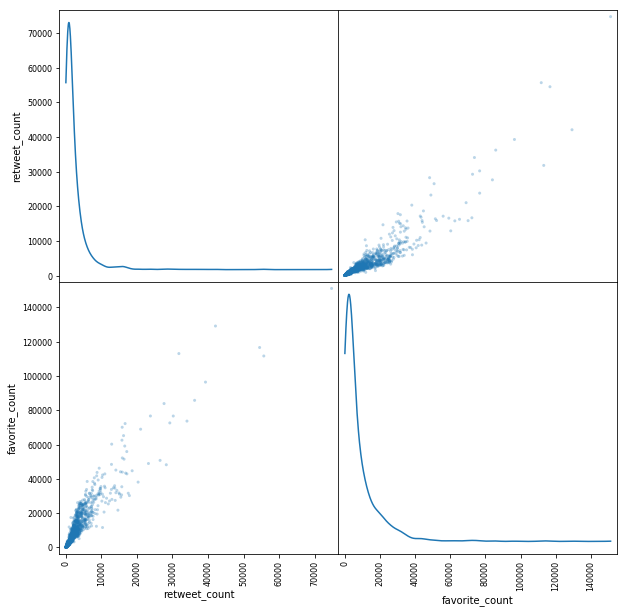

In [43]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(df.loc[:,['retweet_count','favorite_count']], alpha = 0.3, figsize = (10,10), diagonal = 'kde');


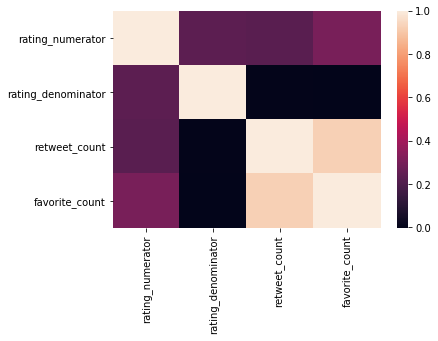

In [49]:
corr = df.loc[:,['rating_numerator','rating_denominator','retweet_count','favorite_count']].corr()
sns.heatmap(corr);

#### Those figures show several things:
##### a positive correlation between the favorites and retweets  


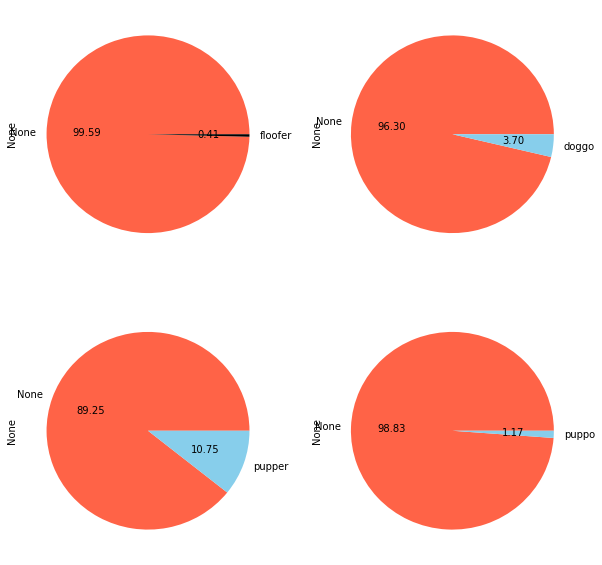

In [44]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(10, 10))

df.groupby('floofer').size().plot(kind='pie', autopct='%.2f',
                                  colors=['tomato', 'black'], ax=ax1)

df.groupby('doggo').size().plot(kind='pie', autopct='%.2f',
                                  colors=['tomato', 'skyblue'], ax=ax2)

df.groupby('pupper').size().plot(kind='pie', autopct='%.2f',
                                  colors=['tomato', 'skyblue'], ax=ax3)

df.groupby('puppo').size().plot(kind='pie', autopct='%.2f',
                                  colors=['tomato', 'skyblue'], ax=ax4)

plt.show()


##### these four pie charts showes the various stages of dog: doggo, pupper, puppo, and floofer and as showen   the 'pupper' is the most domniated in the tweets 

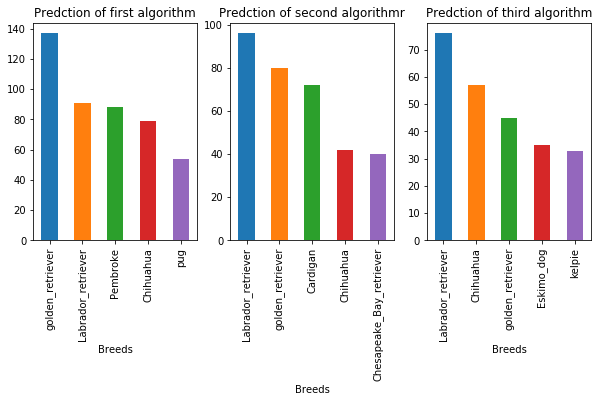

In [50]:
fig, ((ax1), (ax2),(ax3)) = plt.subplots(nrows=1,ncols=3, figsize=(10, 4))

df[df['p1_dog'] == True].p1.sort_values().value_counts().head(5).plot(kind='bar', ax=ax1)
df[df['p2_dog'] == True].p2.sort_values().value_counts().head(5).plot(kind='bar', ax=ax2)
df[df['p3_dog'] == True].p3.sort_values().value_counts().head(5).plot(kind='bar', ax=ax3)
ax1.set_xlabel('Breeds')
ax1.set_title('Predction of first algorithm')
ax2.set_xlabel('Breeds')
ax2.set_title('Predction of second algorithmr')
ax3.set_xlabel('Breeds')
ax3.set_title('Predction of third algorithm')

plt.show()


##### As it can be seen, the pair ‘golden retriever / Labrador retriever’ is the absolute leader in terms of top breeds which classified from the different three algorithms

In [71]:
df.sort_values(by='favorite_count', ascending=False).iloc[0]

tweet_id                                             744234799360020481
timestamp                                           2016-06-18 18:26:18
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                             doggo
floofer                                                            None
pupper                                                             None
puppo                                                              None
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                         

### case study
##### case study for the highest Tweet has retweets and favorites it's in 2016 and it's doggo and it's breed is 'Labrador retriever' 
##### here the url
#####  https://twitter.com/dog_rates/status/744234799360020481/video/1